In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utils import value_counts, decorate

## Data

Monitoring the Future: A Continuing Study of American Youth (8th- and 10th-Grade Surveys)

https://www.icpsr.umich.edu/web/NAHDAP/studies/38883#

In [3]:
from glob import glob

filenames = glob('data/ICPSR*.zip')
filenames

['data/ICPSR_02475-V1.zip',
 'data/ICPSR_35166-V2.zip',
 'data/ICPSR_37183-V1.zip',
 'data/ICPSR_38502-V1.zip',
 'data/ICPSR_20180-V2.zip',
 'data/ICPSR_37415-V1.zip',
 'data/ICPSR_34574-V2.zip',
 'data/ICPSR_02523-V1.zip',
 'data/ICPSR_02390-V1.zip',
 'data/ICPSR_02752-V2.zip',
 'data/ICPSR_03752-V2.zip',
 'data/ICPSR_38189-V1.zip',
 'data/ICPSR_33902-V1.zip',
 'data/ICPSR_02350-V2.zip',
 'data/ICPSR_04537-V2.zip',
 'data/ICPSR_22500-V1.zip',
 'data/ICPSR_30984-V1.zip',
 'data/ICPSR_36149-V1.zip',
 'data/ICPSR_38883-V1.zip',
 'data/ICPSR_36407-V1.zip',
 'data/ICPSR_02940-V1.zip',
 'data/ICPSR_04263-V2.zip',
 'data/ICPSR_04018-V2.zip',
 'data/ICPSR_03426-V1.zip',
 'data/ICPSR_02521-V2.zip',
 'data/ICPSR_02522-V2.zip',
 'data/ICPSR_25422-V2.zip',
 'data/ICPSR_36799-V1.zip',
 'data/ICPSR_02476-V1.zip',
 'data/ICPSR_37842-V1.zip',
 'data/ICPSR_28402-V1.zip',
 'data/ICPSR_39171-V1.zip',
 'data/ICPSR_03183-V1.zip']

In [4]:
import zipfile


def read_dta_from_zip(zip_filename, index=0):
    with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
        # Get the list of files and find the first .dta file
        file_list = zip_ref.namelist()
        dta_files = [f for f in file_list if f.lower().endswith('.dta')]

        if len(dta_files) == 0:
            raise FileNotFoundError("No .dta file found in the ZIP archive.")

        # Read the .dta file into a DataFrame
        stata_path = dta_files[index]
        with zip_ref.open(stata_path) as dta_file:
            df = pd.read_stata(dta_file, convert_categoricals=False)

    return df

In [5]:
import zipfile
import pandas as pd
from functools import reduce

def read_all_dta_from_zip(zip_filename):
    dfs = []
    
    with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
        dta_files = [f for f in zip_ref.namelist() if f.lower().endswith('.dta')]

        if not dta_files:
            raise FileNotFoundError("No .dta files found in the ZIP archive.")

        for path in dta_files:
            with zip_ref.open(path) as dta_file:
                df = pd.read_stata(dta_file, convert_categoricals=False)
                dfs.append(df)
                
    return dfs

    # Merge all dataframes on 'CASEID'
    merged_df = reduce(lambda left, right: pd.merge(left, right, on="CASEID", how="outer"), 
                       dfs)
    return merged_df


In [6]:
def get_year_to_filename(filenames, index=0):
    year_to_filename = {}

    for zip_filename in filenames:
        print(zip_filename)
        df = read_dta_from_zip(zip_filename, index=index)

        years = df['V1'].value_counts()
        if len(years) != 1:
            raise ValueError(f"Unexpected number of unique years in V1 for {zip_filename}: {len(years)}")

        year = int(years.index[0])
        if year < 1900:
            year += 1900
        print(year)
        year_to_filename[year] = zip_filename

    return year_to_filename


In [7]:
ZIPFILE = {
    1991: 'data/ICPSR_02521-V2.zip',
    1992: 'data/ICPSR_02522-V2.zip',
    1993: 'data/ICPSR_02523-V1.zip',
    1994: 'data/ICPSR_02475-V1.zip',
    1995: 'data/ICPSR_02390-V1.zip',
    1996: 'data/ICPSR_02350-V2.zip',
    1997: 'data/ICPSR_02476-V1.zip',
    1998: 'data/ICPSR_02752-V2.zip',
    1999: 'data/ICPSR_02940-V1.zip',
    2000: 'data/ICPSR_03183-V1.zip',
    2001: 'data/ICPSR_03426-V1.zip',
    2002: 'data/ICPSR_03752-V2.zip',
    2003: 'data/ICPSR_04018-V2.zip',
    2004: 'data/ICPSR_04263-V2.zip',
    2005: 'data/ICPSR_04537-V2.zip',
    2006: 'data/ICPSR_20180-V2.zip',
    2007: 'data/ICPSR_22500-V1.zip',
    2008: 'data/ICPSR_25422-V2.zip',
    2009: 'data/ICPSR_28402-V1.zip',
    2010: 'data/ICPSR_30984-V1.zip',
    2011: 'data/ICPSR_33902-V1.zip',
    2012: 'data/ICPSR_34574-V2.zip',
    2013: 'data/ICPSR_35166-V2.zip',
    2014: 'data/ICPSR_36149-V1.zip',
    2015: 'data/ICPSR_36407-V1.zip',
    2016: 'data/ICPSR_36799-V1.zip',
    2017: 'data/ICPSR_37183-V1.zip',
    2018: 'data/ICPSR_37415-V1.zip',
    2019: 'data/ICPSR_37842-V1.zip',
    2020: 'data/ICPSR_38189-V1.zip',
    2021: 'data/ICPSR_38502-V1.zip',
    2022: 'data/ICPSR_38883-V1.zip',
    2023: 'data/ICPSR_39171-V1.zip'
}

In [8]:
year = 2023
zip_filename = ZIPFILE[year]
zip_filename

'data/ICPSR_39171-V1.zip'

In [9]:
from collections import defaultdict

import bisect

class YearLookupDict:
    def __init__(self, year_value_pairs, default=None):
        # Sort by year
        self._years, self._values = zip(*sorted(year_value_pairs.items()))
        self._default = default

    def __getitem__(self, year):
        i = bisect.bisect_right(self._years, year) - 1
        if i < 0:
            if self._default is not None:
                return self._default
            raise KeyError(f"No entry for year {year} and no default set.")
        return self._values[i]

    def __contains__(self, year):
        return year in self._years

    def items(self):
        return zip(self._years, self._values)

    def get(self, year, default=None):
        try:
            return self[year]
        except KeyError:
            return default

In [10]:
INDICES = {
    1991: [[0], [2]],
    1997: [[0, 1], [4, 5]],
    2012: [[0]]
}
INDICES = YearLookupDict(INDICES)

In [11]:
def read_forms(zip_filename, indices):
    dfs = [read_dta_from_zip(zip_filename, index=index) for index in indices]
    suffixes = [None, '_y']
    df = reduce(lambda left, right: 
                pd.merge(left, right, on="CASEID", how="outer", suffixes=suffixes), 
                dfs)
    return df

In [12]:
INDICES[year]

[[0]]

In [13]:
dfs = [read_forms(zip_filename, indices) for indices in INDICES[year]]
df = pd.concat(dfs, ignore_index=True).copy()

In [14]:
df.head()

,AI_08,AI_10,V1,V3,V5,V501,V507,V508,V509,V545,...,V7135D,V7136D,V7137D,V7138D,V7142D,V7143D,V7144D,V7139D,V7140D,V7141D
0,10001.0,NaN,2023,1,2.976963,8,4,1,1,3,...,-9,-9,-9,-9,-8,-8,-8,-8,-8,-8
1,10002.0,NaN,2023,1,2.551195,8,3,0,1,3,...,-9,-9,-9,-9,-8,-8,-8,-8,-8,-8
2,10003.0,NaN,2023,1,0.330394,8,3,0,0,3,...,-9,-9,-9,-9,-8,-8,-8,-8,-8,-8
3,10004.0,NaN,2023,1,1.209440,8,1,0,1,3,...,-9,-9,-9,-9,-8,-8,-8,-8,-8,-8
4,10005.0,NaN,2023,1,0.787398,8,1,0,1,3,...,-9,-9,-9,-9,-8,-8,-8,-8,-8,-8


In [15]:
df.shape

(14734, 655)

In [16]:
df.head()

,AI_08,AI_10,V1,V3,V5,V501,V507,V508,V509,V545,...,V7135D,V7136D,V7137D,V7138D,V7142D,V7143D,V7144D,V7139D,V7140D,V7141D
0,10001.0,NaN,2023,1,2.976963,8,4,1,1,3,...,-9,-9,-9,-9,-8,-8,-8,-8,-8,-8
1,10002.0,NaN,2023,1,2.551195,8,3,0,1,3,...,-9,-9,-9,-9,-8,-8,-8,-8,-8,-8
2,10003.0,NaN,2023,1,0.330394,8,3,0,0,3,...,-9,-9,-9,-9,-8,-8,-8,-8,-8,-8
3,10004.0,NaN,2023,1,1.209440,8,1,0,1,3,...,-9,-9,-9,-9,-8,-8,-8,-8,-8,-8
4,10005.0,NaN,2023,1,0.787398,8,1,0,1,3,...,-9,-9,-9,-9,-8,-8,-8,-8,-8,-8


In [17]:
for column in df.columns:
    print(column)

AI_08
AI_10
V1
V3
V5
V501
V507
V508
V509
V545
V548
V549
V550
V7101
V7104
V7105
V7112
V7115
V7118
V7127
V7097
V7133
V7136
V7139
V7142
V8451
V7426
V7121
V7124
V7164
V7145
V7109
V7957
V7962
V7963
V7964
V7158
V7161
V7601
V8480
V7648
V7780
V7783
V7786
V7693
V7106
V7113
V7116
V7119
V7128
V7098
V7134
V7137
V7140
V7143
V8452
V7122
V7125
V7165
V7146
V7110
V7958
V7965
V7159
V7162
V7602
V7488
V7489
V7491
V7492
V7814
V8481
V7495
V7554
V7564
V7569
V7694
V7819
V7781
V7784
V7787
V7102
V7107
V7942
V7114
V7943
V7117
V7120
V7129
V7099
V7135
V7138
V7141
V7144
V8453
V7427
V7123
V7126
V7166
V7147
V7111
V7959
V7966
V7160
V7163
V7603
V8482
V7615
V7616
V7617
V7642
V7695
V7669
V7960
V7961
V7782
V7785
V7788
V7108
V7641
V7442
V7441
V8413
V7443
V7444
V7445
V8417
V8418
V8419
V8483
V8421
V7446
V7447
V8424
V8425
V7448
V7751
V7449
V8564
V7548
V7789
V7103
V7180
V7181
V7475
V7476
V7477
V7478
V7479
V7480
V7790
V7829
V7830
V7547
V7549
V7550
V7643
V7176
V7587
V7724
V7885
V7791
V7793
V7834
V7835
V7836
V7837
V7838
V7839
V78

In [18]:
WEIGHT = {
    1991: 'V5',
}
WEIGHT = YearLookupDict(WEIGHT, 'V5')

In [19]:
df[WEIGHT[year]].describe()

count    14734.000000
mean         1.000000
std          0.935002
min          0.112841
25%          0.424133
50%          0.781029
75%          1.137452
max         11.172020
Name: V5, dtype: float64

In [20]:
GRADE = {
    1991: 'V1101',
    2011: 'V1101',
    2012: 'V501'
}
GRADE = YearLookupDict(GRADE)

In [21]:
df[GRADE[year]] = df[GRADE[year]].replace([0, 9, -9], np.nan)
# TODO Replace code 2 with grade 8
# TODO Replace code 4 with grade 10

value_counts(df[GRADE[year]])

,counts
values,
8,6240
10,8494


In [22]:
"""
V7202: 00030:R01 R'S SEX F1234
Item number: 00030
What is your sex?
- 382 -1="Male" 2="Female" 3="Other" 4="Prefer not to answer"
""";

In [23]:
GENDER = {
    1991: 'V1226',
    1992: 'V1225',
    1993: 'V1226',
    1994: 'V1227',
    1995: 'V1233',
    1996: 'V1235',
    1998: 'V1233',
    2001: 'V1232',
    2004: 'V1233',
    2006: 'V1246',
    2010: 'V2238',
    2012: 'V7202'
}
GENDER = YearLookupDict(GENDER)

In [24]:
df[GENDER[year]] = df[GENDER[year]].replace([0, 9, -9], np.nan)
value_counts(df[GENDER[year]])

,counts
values,
1.0,6744
2.0,6492
3.0,210
4.0,541
NaN,747


In [25]:
pd.crosstab(df[GRADE[year]], df[GENDER[year]], dropna=False)

V7202,1.0,2.0,3.0,4.0,NaN
V501,,,,,
8,2868,2756,71,240,305
10,3876,3736,139,301,442


## Target variables

In [26]:
"""
V7341: 07970:D05 MN=ACHV/WMN=HOME F2
Item number: 07970
How much do you agree or disagree with each statement below?
It is usually better for everyone involved if the man is the achiever 
outside the home and the woman takes care of
the home and family
1="Disagree" 2="Mostly Disagree" 3="Neither" 4="Mostly Agree" 5="Agree"
Responses from the Western region intentionally deleted.
"""

'\nV7341: 07970:D05 MN=ACHV/WMN=HOME F2\nItem number: 07970\nHow much do you agree or disagree with each statement below?\nIt is usually better for everyone involved if the man is the achiever \noutside the home and the woman takes care of\nthe home and family\n1="Disagree" 2="Mostly Disagree" 3="Neither" 4="Mostly Agree" 5="Agree"\nResponses from the Western region intentionally deleted.\n'

In [27]:
FEFAM = {
    1991: 'V1141',
    1995: 'V1142',
    1998: 'V2140',
    2004: 'V1143',
    2006: 'V2141',
    2009: 'V2142',
    2012: 'V7341'
}
FEFAM = YearLookupDict(FEFAM)

In [28]:
df[FEFAM[year]] = df[FEFAM[year]].replace([0, 6, 9, -8, -9], np.nan)
value_counts(df[FEFAM[year]])

,counts
values,
1.0,1206
2.0,643
3.0,1067
4.0,608
5.0,497
NaN,10713


In [29]:
def set_target(df, varname, values, newname):
    valid = df[varname].notna()
    df[newname] = np.where(valid, df[varname].isin(values), np.nan)

In [30]:
set_target(df, FEFAM[year], [1, 2], 'fefam')
df['fefam'].mean()

np.float64(0.4598358617259388)

In [31]:
"""V7339: 07930:D06 MEN+WOMN/=$,=WRK F2
Item number: 07930
The next questions ask your opinions about a number of different topics. How much do you agree or disagree with
each statement below?
Men and women should be paid the same money if they do the same work
1="Disagree" 2="Mostly Disagree" 3="Neither" 4="Mostly Agree" 5="Agree"
"""

'V7339: 07930:D06 MEN+WOMN/=$,=WRK F2\nItem number: 07930\nThe next questions ask your opinions about a number of different topics. How much do you agree or disagree with\neach statement below?\nMen and women should be paid the same money if they do the same work\n1="Disagree" 2="Mostly Disagree" 3="Neither" 4="Mostly Agree" 5="Agree"\n'

In [32]:
FEWORK = {
    1991: 'V1139',
    1995: 'V1140',
    1998: 'V2138',
    2004: 'V1141',
    2006: 'V2139',
    2009: 'V2140',
    2012: 'V7339',
}
FEWORK = YearLookupDict(FEWORK)

In [33]:
df[FEWORK[year]] = df[FEWORK[year]].replace([0, 9, -8, -9], np.nan)
value_counts(df[FEWORK[year]])

,counts
values,
1.0,194
2.0,137
3.0,287
4.0,752
5.0,3360
NaN,10004


In [34]:
set_target(df, FEWORK[year], [4, 5], 'fework')
value_counts(df['fework'])

,counts
values,
0.0,618
1.0,4112
NaN,10004


In [35]:
df['fework'].mean()

np.float64(0.8693446088794926)

In [36]:
"""
V7340: 07950:D06 WMN SHD =JOB OPP F2
Item number: 07950
How much do you agree or disagree with each statement below?
A woman should have exactly the same job opportunities as a man
1="Disagree" 2="Mostly Disagree" 3="Neither" 4="Mostly Agree" 5="Agree"
""";

In [37]:
FEJOB = {
    1991: 'V1140',
    1995: 'V1141',
    1998: 'V2139',
    2004: 'V1142',
    2006: 'V2140',
    2009: 'V2141',
    2012: 'V7340'
}
FEJOB = YearLookupDict(FEJOB)

In [38]:
df[FEJOB[year]] = df[FEJOB[year]].replace([0, 9, -8, -9], np.nan)
value_counts(df[FEJOB[year]])

,counts
values,
1.0,249
2.0,205
3.0,367
4.0,950
5.0,2949
NaN,10014


In [39]:
set_target(df, FEJOB[year], [4, 5], 'fejob')
value_counts(df['fejob'])

,counts
values,
0.0,821
1.0,3899
NaN,10014


In [40]:
df['fejob'].mean()

np.float64(0.8260593220338983)

## Summarize

In [41]:
df.groupby(GENDER[year])[['fejob', 'fework', 'fefam']].mean()

,fejob,fework,fefam
V7202,,,
1.0,0.727438,0.798277,0.284887
2.0,0.928671,0.945497,0.620783
3.0,0.888889,0.873016,0.679245
4.0,0.858824,0.883721,0.639706


In [42]:
df.groupby([GRADE[year], GENDER[year]])[['fejob', 'fework', 'fefam']].mean()

fejob    fework     fefam
V501 V7202                              
8    1.0    0.721703  0.784008  0.270391
     2.0    0.921739  0.938312  0.619835
     3.0    0.952381  0.904762  0.600000
     4.0    0.924242  0.909091  0.672414
10   1.0    0.731884  0.809332  0.297809
     2.0    0.933818  0.950846  0.621594
     3.0    0.857143  0.857143  0.727273
     4.0    0.817308  0.867925  0.615385

In [43]:
"""
V1070: 89501:R01 RACE--B/W/H F1234
Item Number: 00041-49
Recoded from the following: Q. C04 (00041-00049): "How do you describe yourself? (Select one or more responses.)
A.Black or African American; B. Mexican American or Chicano; C. Cuban American; D. Puerto Rican;
E. Other Hispanic or Latino; F. Asian American; G. White (Caucasian); H. American Indian or Alaska Native;
I. Native Hawaiian or Other Pacific Islander."
1="Black or African American" , 2="White (Caucasian)",
3=Hispanic ("Mexican . . . " or "Cuban . . . " or "Puerto Rican" or "Other Hispanic . . . ").
All other responses, including those of respondents who fell into more than one of the three recoded categories,
were recoded to missing data.
"""

'\nV1070: 89501:R01 RACE--B/W/H F1234\nItem Number: 00041-49\nRecoded from the following: Q. C04 (00041-00049): "How do you describe yourself? (Select one or more responses.)\nA.Black or African American; B. Mexican American or Chicano; C. Cuban American; D. Puerto Rican;\nE. Other Hispanic or Latino; F. Asian American; G. White (Caucasian); H. American Indian or Alaska Native;\nI. Native Hawaiian or Other Pacific Islander."\n1="Black or African American" , 2="White (Caucasian)",\n3=Hispanic ("Mexican . . . " or "Cuban . . . " or "Puerto Rican" or "Other Hispanic . . . ").\nAll other responses, including those of respondents who fell into more than one of the three recoded categories,\nwere recoded to missing data.\n'

In [49]:
from mtf import process_year, compute_target_means

# Loop through all years, compute means, and collect results
results = []
for year in sorted(ZIPFILE.keys()):
    # print(f"Processing year {year}")
    df = process_year(year).query('gender == 1.0')
    result = compute_target_means(df, weighted=True)
    result['year'] = year  # Add year to result after computing means
    results.append(result)

# Create a DataFrame of the results and print
results_df = pd.DataFrame(results).set_index('year', drop=True)


<Axes: xlabel='year'>

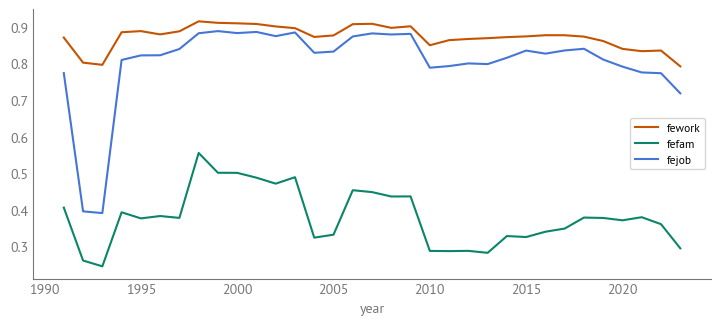

In [50]:
results_df.plot()